In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [45]:
stud = pd.read_csv(r'C:\Project_2\stud_math.csv')

In [46]:
display(stud.head(30))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [47]:
#395 учеников
#30 колонок
#
#
#

In [48]:
print(stud.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')


In [49]:
print(stud.school.nunique())
pd.DataFrame(stud.school.value_counts())

2


,school
GP,349
MS,46


Количество пустых строк: 0
% пустых строк: 0.0


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

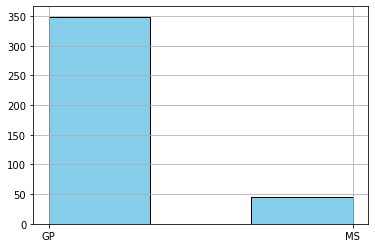

In [50]:
stud.school.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
stud.school.describe()
print("Количество пустых строк:", stud.school.isnull().sum()) 
print("% пустых строк:", stud.school.isnull().sum()/395*100) 
stud.school.describe()

In [51]:
print(stud.sex.nunique())
pd.DataFrame(stud.sex.value_counts())

2


,sex
F,208
M,187


Количество пустых строк: 0
% пустых строк: 0.0


count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

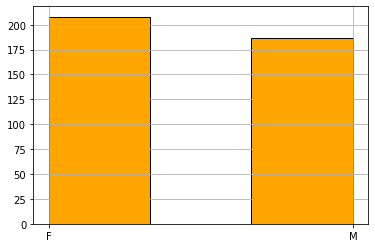

In [52]:
stud.sex.hist(grid=True, bins=3, color = 'orange',edgecolor = 'black')
print("Количество пустых строк:", stud.sex.isnull().sum()) 
print("% пустых строк:", stud.sex.isnull().sum()/395*100) 
stud.sex.describe()

In [ ]:
#Проверяем количество учеников по возрасту "age" (получаем 8 возрастных групп)

In [53]:
print(stud.age.nunique())
pd.DataFrame(stud.age.value_counts())

8


,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


Количество пустых строк: 0
% пустых строк: 0.0


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

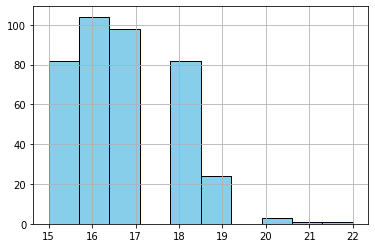

In [138]:
stud.age.hist(grid=True, bins=10, color = 'skyblue',edgecolor = 'black')
print("Количество пустых строк:", stud.age.isnull().sum())
print("% пустых строк:", stud.age.isnull().sum()/395*100) 
stud.age.describe()

In [ ]:
#Проверяем количество учеников по адресам (получаем 2 типа)

In [55]:
print(stud.address.nunique())
pd.DataFrame(stud.address.value_counts())


2


,address
U,295
R,83


Количество пустых строк: 17
~ % пустых строк: 4 %


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

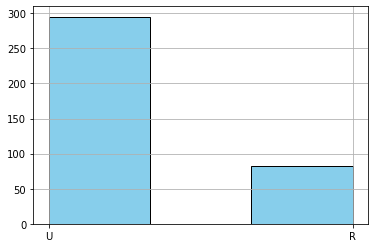

In [54]:
stud.address.hist(grid=True, bins=3, color = 'skyblue' ,edgecolor = 'black')
print("Количество пустых строк:", stud.address.isnull().sum())
print("~ % пустых строк:", round(stud.address.isnull().sum()/395*100), '%')
stud.address.describe()

In [ ]:
#Проверяем количество учеников по количеству членов в семье (получаем 2 типа)

In [13]:
print(stud.famsize.nunique())
pd.DataFrame(stud.famsize.value_counts())

2


,famsize
GT3,261
LE3,107


Количество пустых строк: 27
~ % пустых строк: 7 %


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

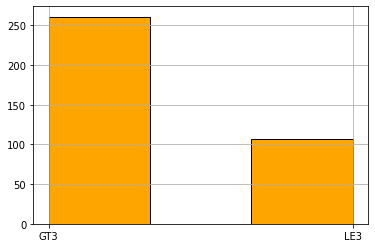

In [136]:
stud.famsize.hist(grid=True, bins=3, color = 'orange',edgecolor = 'black')
print("Количество пустых строк:", stud.famsize.isnull().sum())
print("~ % пустых строк:", round(stud.famsize.isnull().sum()/395*100), '%')
stud.famsize.describe()

In [ ]:
#Проверяем количество учеников по "статус совместного жилья родителей" (получаем 2 типа)

In [19]:
print(stud.Pstatus.nunique())
pd.DataFrame(stud.Pstatus.value_counts())

2


,Pstatus
T,314
A,36


Количество пустых строк: 45
~ % пустых строк: 11 %


count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

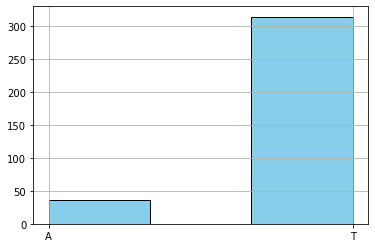

In [140]:
stud.Pstatus.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.Pstatus.isnull().sum())
print("~ % пустых строк:", round(stud.Pstatus.isnull().sum()/395*100), '%')
stud.Pstatus.describe()

In [ ]:
#Проверяем количество учеников по образованию матери

In [22]:
print(stud.Medu.nunique())
pd.DataFrame(stud.Medu.value_counts())

5


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Количество пустых строк: 3
~ % пустых строк: 1 %


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

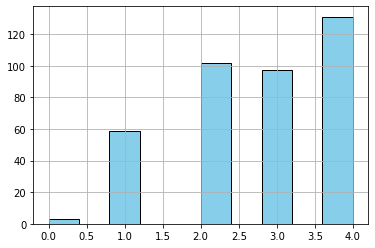

In [36]:
stud.Medu.hist(grid=True, bins=10, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.Medu.isnull().sum())
print("~ % пустых строк:", round(stud.Medu.isnull().sum()/395*100), '%')
stud.Medu.describe()

In [ ]:
#Проверяем количество учеников по образованию отца

In [44]:
print(stud.Fedu.nunique())
pd.DataFrame(stud.Fedu.value_counts())

6


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Количество пустых строк: 24
~ % пустых строк: 6 %


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

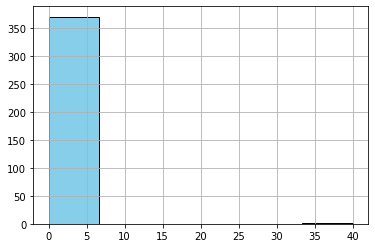

In [41]:
stud.Fedu.hist(grid=True, bins=6, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.Fedu.isnull().sum())
print("~ % пустых строк:", round(stud.Fedu.isnull().sum()/395*100), '%')
stud.Fedu.describe()

In [146]:
IQR = stud.Fedu.quantile(0.75) - stud.Fedu.quantile(0.25)
perc25 = stud.Fedu.quantile(0.25)
perc75 = stud.Fedu.quantile(0.75)
 
print('25-й перцентиль:', perc25)
print('75-й перцентиль:', perc75)
print("IQR:", IQR)
IQR=perc75-perc25
stud.loc[~stud.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR), "absences"]

25-й перцентиль: 2.0
75-й перцентиль: 3.0
IQR: 1.0


11      4.0
21      0.0
42      2.0
46     12.0
57      4.0
58      2.0
67      4.0
76      8.0
137     0.0
142     2.0
159     4.0
161     6.0
171     2.0
180    10.0
195     0.0
232    14.0
236     4.0
259     0.0
280    30.0
281    19.0
286     5.0
287     6.0
290    11.0
310     0.0
328     7.0
349    10.0
374     0.0
Name: absences, dtype: float64

In [ ]:
#Удаляем выброс, как кажется ошибка ввода

In [ ]:
#Проверяем количество учеников по работе матери "Mjob"

In [29]:
print(stud.Mjob.nunique())
pd.DataFrame(stud.Mjob.value_counts())

5


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Количество пустых строк: 19
~ % пустых строк: 5 %


count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

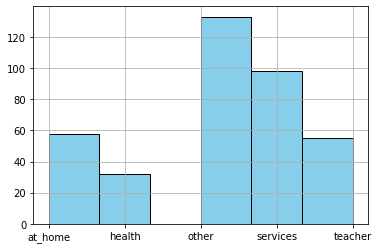

In [149]:
stud.Mjob.hist(grid=True, bins=6, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.Mjob.isnull().sum())
print("~ % пустых строк:", round(stud.Mjob.isnull().sum()/395*100), '%')
stud.Mjob.describe()

In [ ]:
#Проверяем количество учеников по работе отца "Fjob"

In [30]:
print(stud.Fjob.nunique())
pd.DataFrame(stud.Fjob.value_counts())

5


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Количество пустых строк: 36
~ % пустых строк: 9 %
-


count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

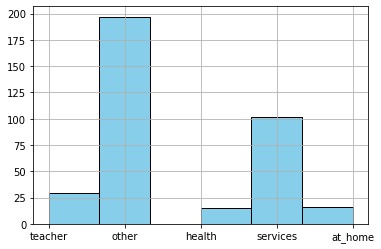

In [35]:
stud.Fjob.hist(grid=True, bins=6, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.Fjob.isnull().sum())
print("~ % пустых строк:", round(stud.Fjob.isnull().sum()/395*100), '%')
print("-")
stud.Fjob.describe()

In [ ]:
#Проверяем количество учеников по причине выбора школы "reason"

In [31]:
print(stud.reason.nunique())
pd.DataFrame(stud.reason.value_counts())

4


,reason
course,137
home,104
reputation,103
other,34


Количество пустых строк: 17
~ % пустых строк: 4 %
-


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

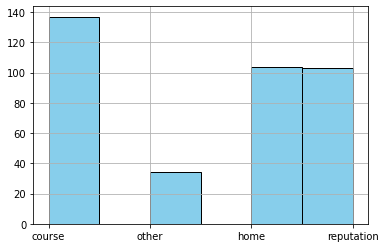

In [34]:
stud.reason.hist(grid=True, bins=6, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.reason.isnull().sum())
print("~ % пустых строк:", round(stud.reason.isnull().sum()/395*100), '%')
print("-")
stud.reason.describe()

In [ ]:
#Проверяем количество учеников по их опекуну "guardian "

In [32]:
print(stud.guardian.nunique())
pd.DataFrame(stud.guardian.value_counts())

3


,guardian
mother,250
father,86
other,28


Количество пустых строк: 31
~ % пустых строк: 8 %
-


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

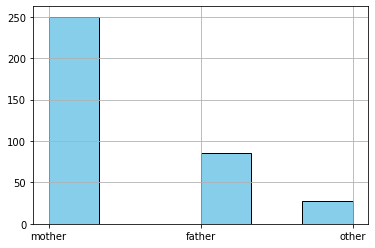

In [33]:
stud.guardian.hist(grid=True, bins=6, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.guardian.isnull().sum())
print("~ % пустых строк:", round(stud.guardian.isnull().sum()/395*100), '%')
print("-")
stud.guardian.describe()

In [ ]:
#Проверяем количество учеников по премени пути до школы "traveltime" 
1 - <15 мин.,
2 - 15-30 мин.
3 - 30-60 мин.
4 - >60 мин.

In [33]:
print(stud.traveltime.nunique())
pd.DataFrame(stud.traveltime.value_counts())

4


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Количество пустых строк: 28
~ % пустых строк: 7 %
-


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

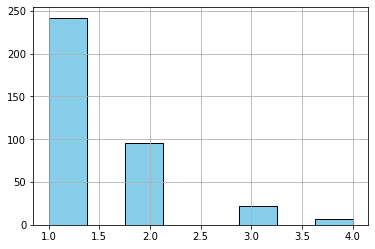

In [32]:
stud.traveltime.hist(grid=True, bins=8, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.traveltime.isnull().sum())
print("~ % пустых строк:", round(stud.traveltime.isnull().sum()/395*100), '%')
print("-")
stud.traveltime.describe()

In [ ]:
#Проверяем количество учеников по время на учёбу помимо школы в неделю "studytime"
1 - <2 часов, 
2 - 2-5 часов, 
3 - 5-10 часов, 
4 - >10 часов

In [34]:
print(stud.studytime.nunique())
pd.DataFrame(stud.studytime.value_counts())

4


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Количество пустых строк: 7
~ % пустых строк: 2 %
-


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

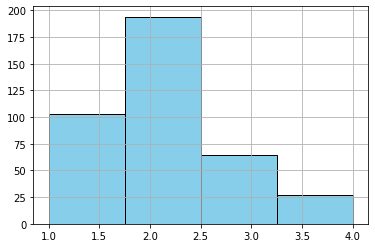

In [31]:
stud.studytime.hist(grid=True, bins=4, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.studytime.isnull().sum())
print("~ % пустых строк:", round(stud.studytime.isnull().sum()/395*100), '%')
print("-")
stud.studytime.describe()

In [ ]:
#Проверяем количество учеников по количестку внеучебных неудач "failures"
если 1<=n<=3, 
иначе 0

In [35]:
print(stud.failures.nunique())
pd.DataFrame(stud.failures.value_counts())

4


,failures
0.0,293
1.0,49
2.0,16
3.0,15


Количество пустых строк: 22
~ % пустых строк: 6 %
-


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

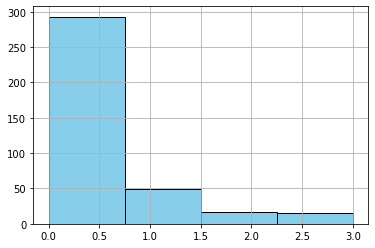

In [30]:
stud.failures.hist(grid=True, bins=4, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.failures.isnull().sum())
print("~ % пустых строк:", round(stud.failures.isnull().sum()/395*100), '%')
print("-")
stud.failures.describe()

In [ ]:
#Проверяем количество учеников по дполнительной образовательной поддержке "schoolsup"

In [36]:
print(stud.schoolsup.nunique())
pd.DataFrame(stud.schoolsup.value_counts())

2


,schoolsup
no,335
yes,51


Количество пустых строк: 9
~ % пустых строк: 2 %
Обнаружен выброс в мозг!!!!!


count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

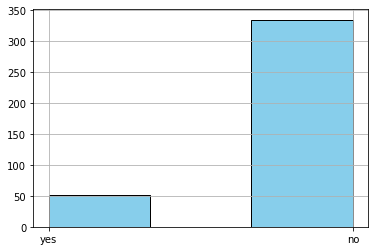

In [6]:
stud.schoolsup.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.schoolsup.isnull().sum())
print("~ % пустых строк:", round(stud.schoolsup.isnull().sum()/395*100), '%')
print("Обнаружен выброс в мозг!!!!!")
stud.schoolsup.describe()

In [ ]:
#Проверяем количество учеников по семейной образовательной поддержке "famsup"

In [37]:
print(stud.famsup.nunique())
pd.DataFrame(stud.famsup.value_counts())

2


,famsup
yes,219
no,137


Количество пустых строк: 39
~ % пустых строк: 10 %
-


count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

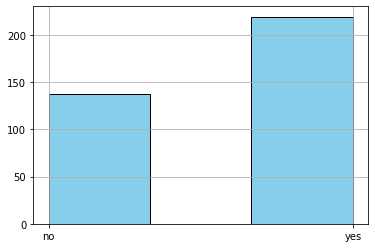

In [29]:
stud.famsup.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.famsup.isnull().sum())
print("~ % пустых строк:", round(stud.famsup.isnull().sum()/395*100), '%')
print("-")
stud.famsup.describe()

In [ ]:
#Проверяем количество учеников по платным дополнитльным занятиям по математе "paid"

In [38]:
print(stud.paid.nunique())
pd.DataFrame(stud.paid.value_counts())

2


,paid
no,200
yes,155


Количество пустых строк: 40
~ % пустых строк: 10 %
-


count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

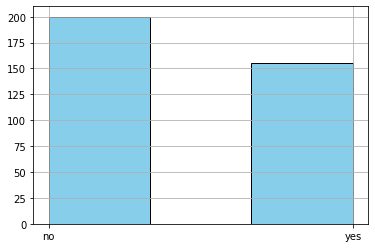

In [28]:
stud.paid.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.paid.isnull().sum())
print("~ % пустых строк:", round(stud.paid.isnull().sum()/395*100), '%')
print("-")
stud.paid.describe()

In [ ]:
#Проверяем количество учеников по дополнительынм внеучебным занятиям "activities"

In [39]:
print(stud.activities.nunique())
pd.DataFrame(stud.activities.value_counts())

2


,activities
yes,195
no,186


Количество пустых строк: 14
~ % пустых строк: 4 %
-


count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

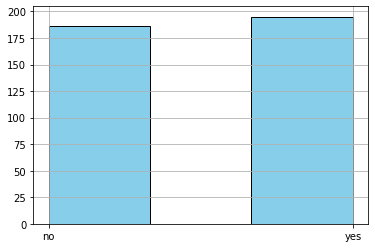

In [27]:
stud.activities.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.activities.isnull().sum())
print("~ % пустых строк:", round(stud.activities.isnull().sum()/395*100), '%')
print("-")
stud.activities.describe()

In [ ]:
#Проверяем количество учеников по посещению детского сада  "nursery"

In [40]:
print(stud.nursery.nunique())
pd.DataFrame(stud.nursery.value_counts())

2


,nursery
yes,300
no,79


Количество пустых строк: 16
~ % пустых строк: 4 %
-


count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

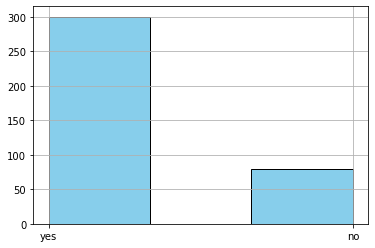

In [26]:
stud.nursery.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.nursery.isnull().sum())
print("~ % пустых строк:", round(stud.nursery.isnull().sum()/395*100), '%')
print("-")
stud.nursery.describe()

In [ ]:
#Проверяем количество учеников по хотению получить высшее образование "higher"

In [41]:
print(stud.higher.nunique())
pd.DataFrame(stud.higher.value_counts())

2


,higher
yes,356
no,19


Количество пустых строк: 20
~ % пустых строк: 5 %
-


count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

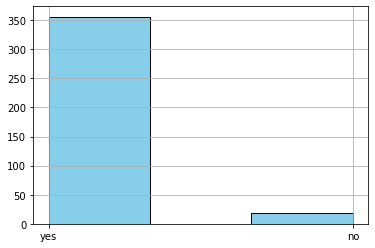

In [25]:
stud.higher.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.higher.isnull().sum())
print("~ % пустых строк:", round(stud.higher.isnull().sum()/395*100), '%')
print("-")
stud.higher.describe()

In [ ]:
#Проверяем количество учеников по наличию инета дома  "internet"

In [42]:
print(stud.internet.nunique())
pd.DataFrame(stud.internet.value_counts())

2


,internet
yes,305
no,56


Количество пустых строк: 34
~ % пустых строк: 9 %
-


count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

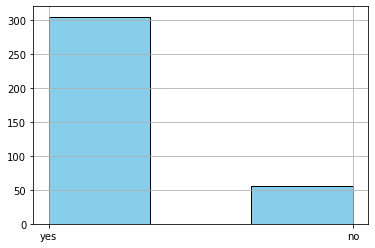

In [24]:
stud.internet.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.internet.isnull().sum())
print("~ % пустых строк:", round(stud.internet.isnull().sum()/395*100), '%')
print("-")
stud.internet.describe()

In [ ]:
#Проверяем количество учеников по Романтическим отношениям "romantic"

In [43]:
print(stud.romantic.nunique())
pd.DataFrame(stud.romantic.value_counts())

2


,romantic
no,240
yes,124


Количество пустых строк: 31
~ % пустых строк: 8 %
-


count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

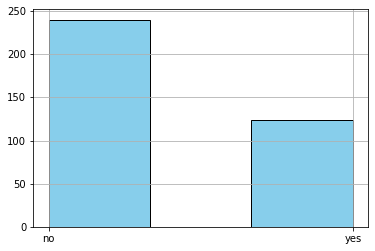

In [23]:
stud.romantic.hist(grid=True, bins=3, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.romantic.isnull().sum())
print("~ % пустых строк:", round(stud.romantic.isnull().sum()/395*100), '%')
print("-")
stud.romantic.describe()

In [ ]:
#Проверяем количество учеников по семейным отношениям "famrel"

Количество пустых строк: 27
~ % пустых строк: 7 %
-


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

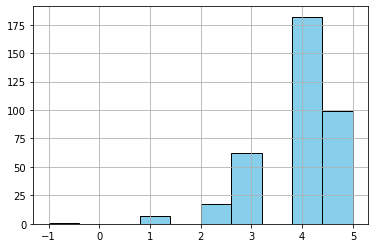

In [22]:
stud.famrel.hist(grid=True, bins=10, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.famrel.isnull().sum())
print("~ % пустых строк:", round(stud.famrel.isnull().sum()/395*100), '%')
print("-")
stud.famrel.describe()

In [ ]:
#Проверяем количество учеников по свободному времени после школы "freetime"  (от 1 - очень мало до 5 - очень мого)

In [45]:
print(stud.freetime.nunique())
pd.DataFrame(stud.freetime.value_counts())

5


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Количество пустых строк: 11
~ % пустых строк: 3 %
-


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

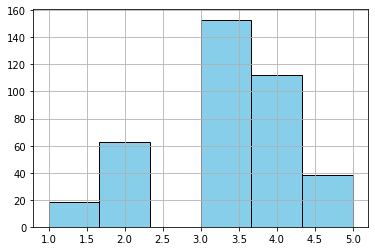

In [21]:
stud.freetime.hist(grid=True, bins=6, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.freetime.isnull().sum())
print("~ % пустых строк:", round(stud.freetime.isnull().sum()/395*100), '%')
print("-")
stud.freetime.describe()

In [ ]:
#Проверяем количество учеников по проведению времни с друзьями "goout"  (от 1 - очень мало до 5 - очень мого)

In [46]:
print(stud.goout.nunique())
pd.DataFrame(stud.goout.value_counts())

5


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Количество пустых строк: 8
~ % пустых строк: 2 %
-


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

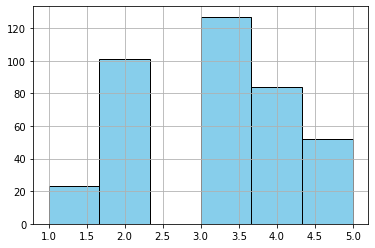

In [20]:
stud.goout.hist(grid=True, bins=6, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.goout.isnull().sum())
print("~ % пустых строк:", round(stud.goout.isnull().sum()/395*100), '%')
print("-")
stud.goout.describe()

In [ ]:
#Проверяем количество учеников по состоянию здоровья "health"  (от 1 - очень мало до 5 - очень мого)

In [47]:
print(stud.health.nunique())
pd.DataFrame(stud.health.value_counts())

5


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [43]:
stud.health.hist(grid=True, bins=10, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.health.isnull().sum())
print("~ % пустых строк:", round(stud.health.isnull().sum()/395*100), '%')
print("-")
stud.health.describe()

AttributeError: 'DataFrame' object has no attribute 'health'

In [ ]:
#Проверяем количество учеников по прогулам "absences"

In [150]:
print(stud.absences.nunique())
pd.DataFrame(stud.absences.value_counts())

36


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


Количество пустых строк: 12
~ % пустых строк: 3 %
-


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

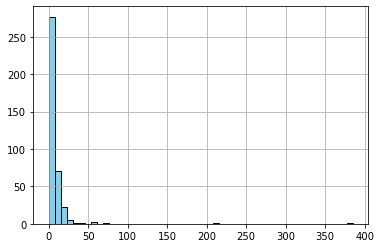

In [28]:
stud.absences.hist(grid=True, bins=50, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.absences.isnull().sum())
print("~ % пустых строк:", round(stud.absences.isnull().sum()/395*100), '%')
print("-")
stud.absences.describe()

In [56]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
 
print('25-й перцентиль:', perc25)
print('75-й перцентиль:', perc75)
print("IQR:", IQR)
IQR=perc75-perc25
stud.loc[~stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR), "absences"]

25-й перцентиль: 0.0
75-й перцентиль: 8.0
IQR: 8.0


24       NaN
40      25.0
74      54.0
101      NaN
103     26.0
120      NaN
129      NaN
150      NaN
172      NaN
183     56.0
198     24.0
205     28.0
215      NaN
216     22.0
222    385.0
227      NaN
254      NaN
260     21.0
265      NaN
270      NaN
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
352      NaN
390    212.0
Name: absences, dtype: float64

In [57]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, 50)|pd.isnull(stud.absences)]

<AxesSubplot:>

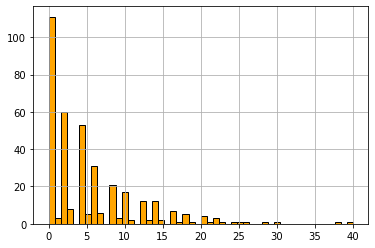

In [58]:
stud.absences.hist(grid=True, bins=50, color = 'orange', edgecolor = 'black')

In [ ]:
#убираем максимальные значения 

In [ ]:
#Проверяем количество учеников баллам госэкзамена по математике  "score"

Количество пустых строк: 6
~ % пустых строк: 2 %
-


count    384.000000
mean      52.239583
std       22.992447
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

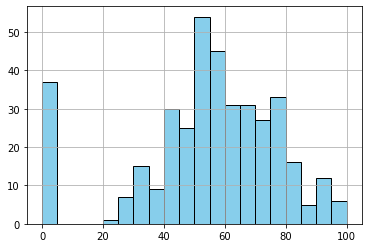

In [59]:
stud.score.hist(grid=True, bins=20, color = 'skyblue', edgecolor = 'black')
print("Количество пустых строк:", stud.score.isnull().sum())
print("~ % пустых строк:", round(stud.score.isnull().sum()/395*100), '%')
print("-")
stud.score.describe()

In [60]:
stud = stud.loc[stud.Fedu.between(0, 4)|pd.isnull(stud.Fedu)]
stud = stud.loc[stud.famrel.between(1, 5)|pd.isnull(stud.famrel)]

In [ ]:
#большое количество нулей из за ошибок или большого количества незачетов или большокго количества людей не пришедших на экзамен

In [61]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.164444,-0.156712,0.091718,-0.013277,0.220793,0.013277,0.056953,0.017290,0.130697,-0.067851,0.191796,-0.152513
Medu,-0.164444,1.000000,0.631160,-0.174954,0.078819,-0.242421,-0.078819,-0.021640,0.025534,0.060707,-0.043214,0.111971,0.216809
Fedu,-0.156712,0.631160,1.000000,-0.154587,0.007066,-0.269520,-0.007066,-0.033370,-0.023466,0.047036,0.027678,0.049870,0.127934
traveltime,0.091718,-0.174954,-0.154587,1.000000,-0.113345,0.076689,0.113345,-0.036489,-0.008847,0.044977,-0.026197,-0.010384,-0.072795
studytime,-0.013277,0.078819,0.007066,-0.113345,1.000000,-0.173167,-1.000000,0.025600,-0.124766,-0.052719,-0.078604,-0.078704,0.113930
failures,0.220793,-0.242421,-0.269520,0.076689,-0.173167,1.000000,0.173167,0.004675,0.092961,0.119324,0.074739,0.117607,-0.344656
"studytime, granular",0.013277,-0.078819,-0.007066,0.113345,-1.000000,0.173167,1.000000,-0.025600,0.124766,0.052719,0.078604,0.078704,-0.113930
famrel,0.056953,-0.021640,-0.033370,-0.036489,0.025600,0.004675,-0.025600,1.000000,0.165081,0.059805,0.101054,-0.075355,0.062532
freetime,0.017290,0.025534,-0.023466,-0.008847,-0.124766,0.092961,0.124766,0.165081,1.000000,0.281323,0.071398,-0.009672,0.018950
goout,0.130697,0.060707,0.047036,0.044977,-0.052719,0.119324,0.052719,0.059805,0.281323,1.000000,-0.009593,0.110847,-0.126309


In [62]:
stud.drop('studytime, granular', axis=1, inplace= True)#ибо повторяет "studytime"

In [36]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.164444,-0.156712,0.091718,-0.013277,0.220793,0.056953,0.017290,0.130697,-0.067851,0.191796,-0.152513
Medu,-0.164444,1.000000,0.631160,-0.174954,0.078819,-0.242421,-0.021640,0.025534,0.060707,-0.043214,0.111971,0.216809
Fedu,-0.156712,0.631160,1.000000,-0.154587,0.007066,-0.269520,-0.033370,-0.023466,0.047036,0.027678,0.049870,0.127934
traveltime,0.091718,-0.174954,-0.154587,1.000000,-0.113345,0.076689,-0.036489,-0.008847,0.044977,-0.026197,-0.010384,-0.072795
studytime,-0.013277,0.078819,0.007066,-0.113345,1.000000,-0.173167,0.025600,-0.124766,-0.052719,-0.078604,-0.078704,0.113930
failures,0.220793,-0.242421,-0.269520,0.076689,-0.173167,1.000000,0.004675,0.092961,0.119324,0.074739,0.117607,-0.344656
famrel,0.056953,-0.021640,-0.033370,-0.036489,0.025600,0.004675,1.000000,0.165081,0.059805,0.101054,-0.075355,0.062532
freetime,0.017290,0.025534,-0.023466,-0.008847,-0.124766,0.092961,0.165081,1.000000,0.281323,0.071398,-0.009672,0.018950
goout,0.130697,0.060707,0.047036,0.044977,-0.052719,0.119324,0.059805,0.281323,1.000000,-0.009593,0.110847,-0.126309
health,-0.067851,-0.043214,0.027678,-0.026197,-0.078604,0.074739,0.101054,0.071398,-0.009593,1.000000,-0.046014,-0.070440


In [63]:
stud.drop(['traveltime','famrel','freetime','health','absences'], axis=1, inplace= True)#Удаляем то что меньше 0,1

In [64]:
stud.corr()

,age,Medu,Fedu,studytime,failures,goout,score
age,1.000000,-0.164444,-0.156712,-0.013277,0.220793,0.130697,-0.152513
Medu,-0.164444,1.000000,0.631160,0.078819,-0.242421,0.060707,0.216809
Fedu,-0.156712,0.631160,1.000000,0.007066,-0.269520,0.047036,0.127934
studytime,-0.013277,0.078819,0.007066,1.000000,-0.173167,-0.052719,0.113930
failures,0.220793,-0.242421,-0.269520,-0.173167,1.000000,0.119324,-0.344656
goout,0.130697,0.060707,0.047036,-0.052719,0.119324,1.000000,-0.126309
score,-0.152513,0.216809,0.127934,0.113930,-0.344656,-0.126309,1.000000


столбец school
Распределение баллов по значениям признака:


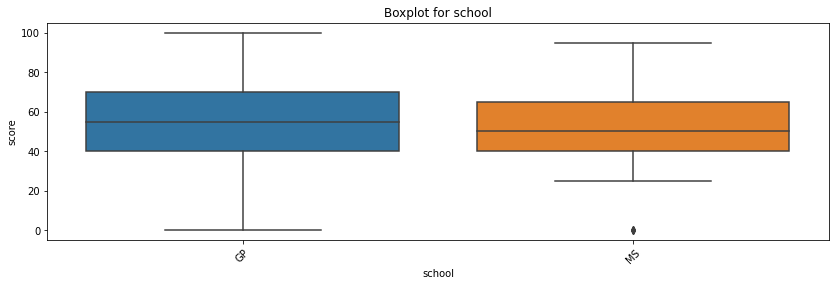

----

столбец sex
Распределение баллов по значениям признака:


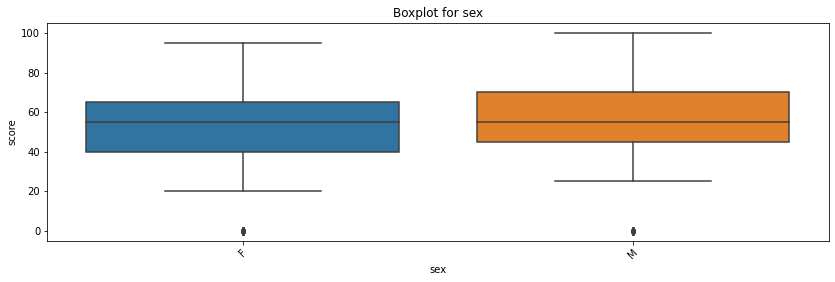

Найдены статистически значимые различия для колонки sex
----

столбец address
Распределение баллов по значениям признака:


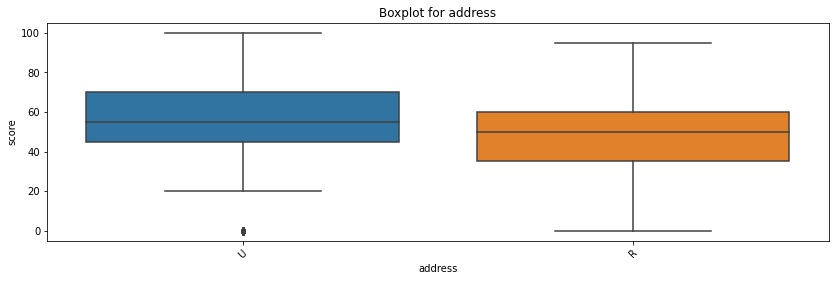

Найдены статистически значимые различия для колонки address
----

столбец famsize
Распределение баллов по значениям признака:


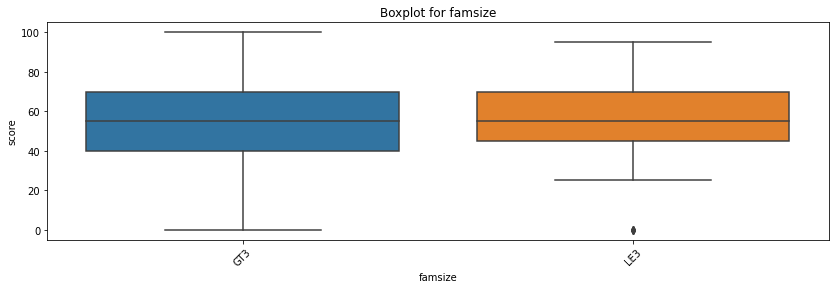

----

столбец Pstatus
Распределение баллов по значениям признака:


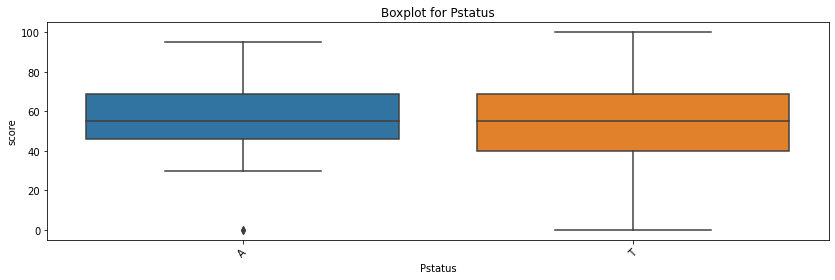

----

столбец Mjob
Распределение баллов по значениям признака:


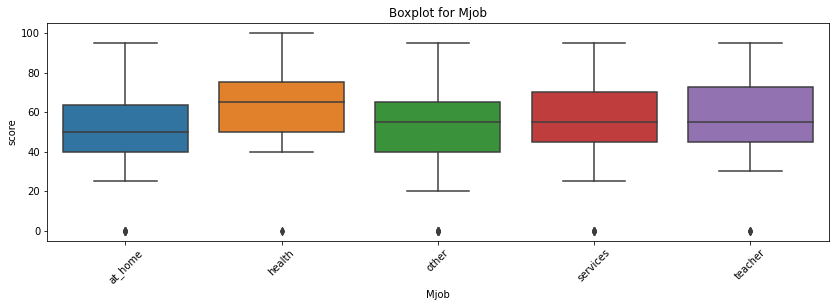

Найдены статистически значимые различия для колонки Mjob
----

столбец Fjob
Распределение баллов по значениям признака:


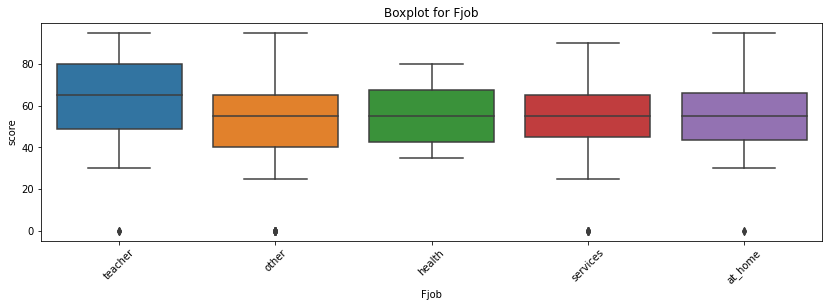

----

столбец reason
Распределение баллов по значениям признака:


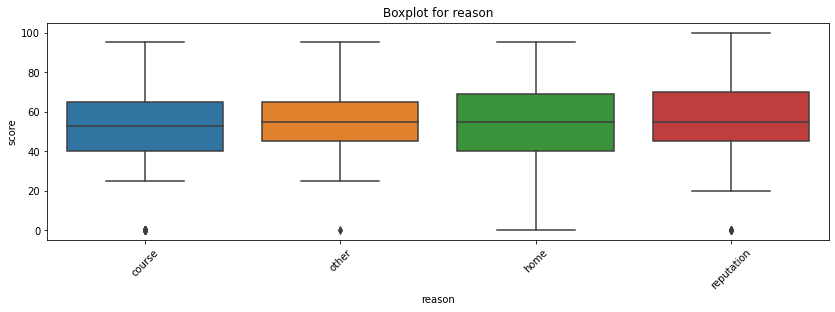

----

столбец guardian
Распределение баллов по значениям признака:


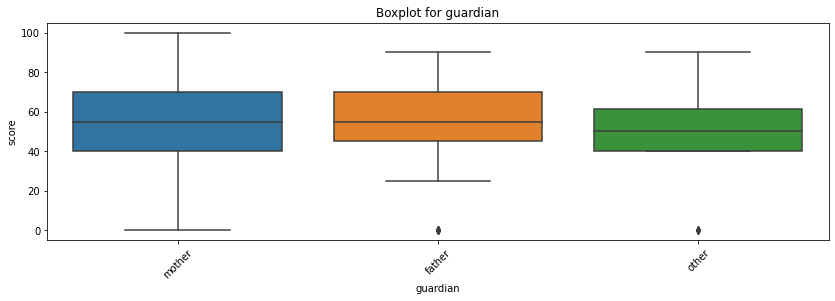

----

столбец schoolsup
Распределение баллов по значениям признака:


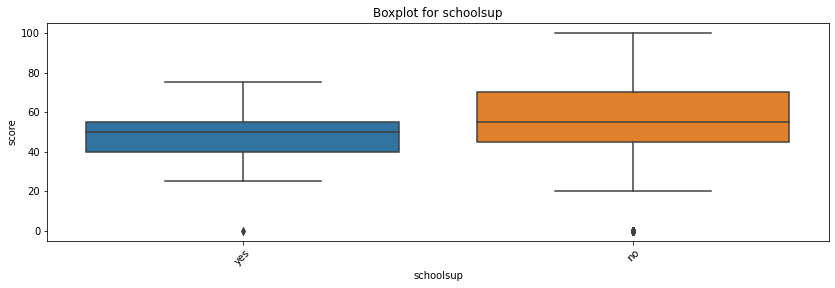

Найдены статистически значимые различия для колонки schoolsup
----

столбец famsup
Распределение баллов по значениям признака:


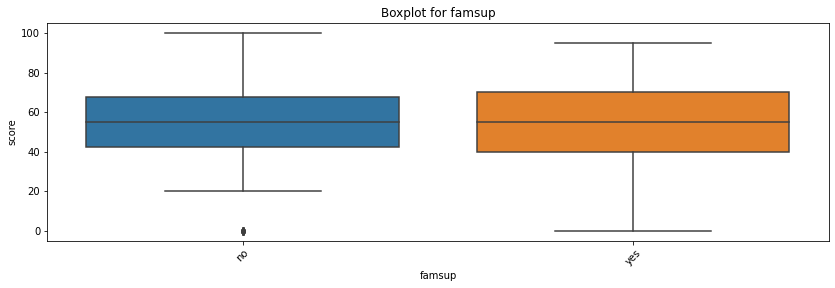

----

столбец paid
Распределение баллов по значениям признака:


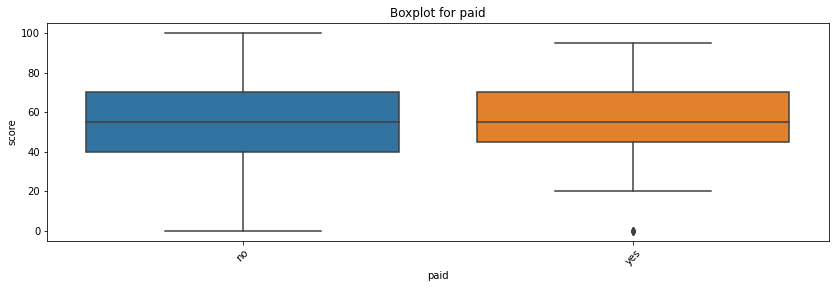

Найдены статистически значимые различия для колонки paid
----

столбец activities
Распределение баллов по значениям признака:


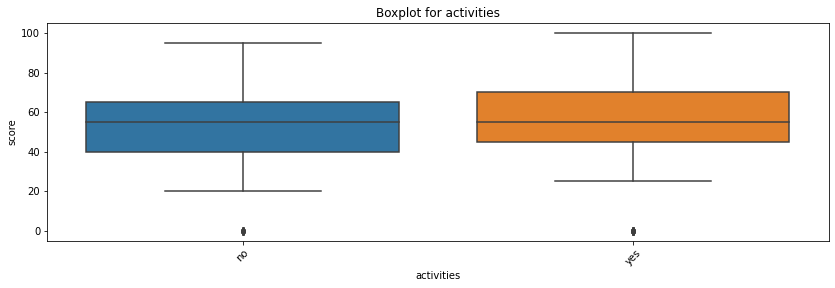

----

столбец nursery
Распределение баллов по значениям признака:


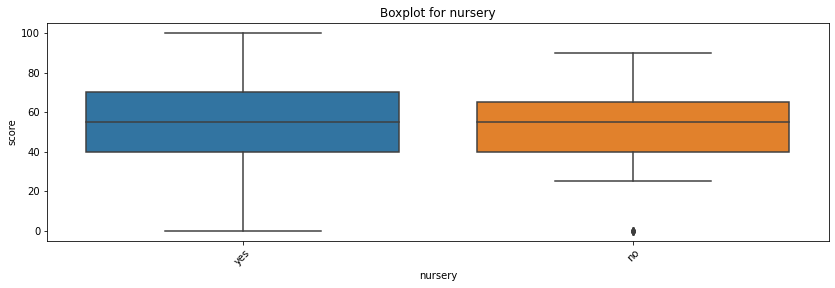

----

столбец higher
Распределение баллов по значениям признака:


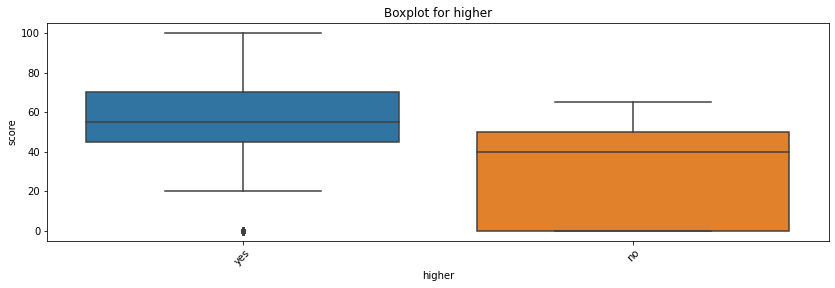

Найдены статистически значимые различия для колонки higher
----

столбец internet
Распределение баллов по значениям признака:


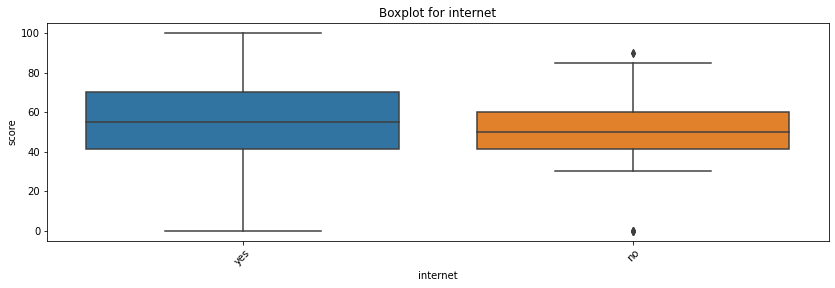

----

столбец romantic
Распределение баллов по значениям признака:


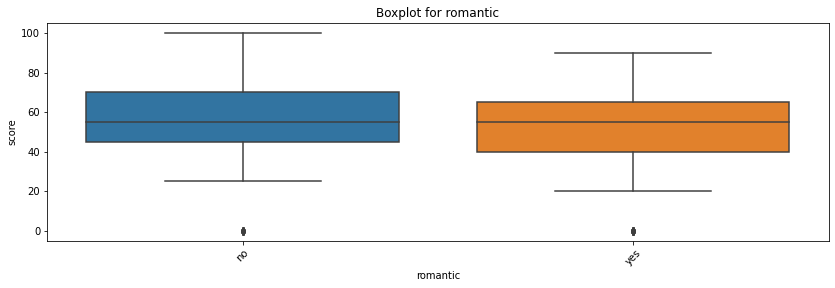

Найдены статистически значимые различия для колонки romantic
----



In [65]:
def NA(col):
    if stud.loc[:, col].dtypes == np.dtype("O"):
        print("столбец", col)
        print("Распределение баллов по значениям признака:")
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=col, y='score', 
                    data=stud, 
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + col)
        plt.show()
        combinations_all = list(combinations(stud.loc[:, col].dropna().unique(), 2))
    
        for pp1 in combinations_all:
            if ttest_ind(stud.loc[stud.loc[:, col] == pp1[0], 'score'].dropna(), 
                        stud.loc[stud.loc[:, col] == pp1[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all): # Учли поправку Бонферони
                print('Найдены статистически значимые различия для колонки', col)
                break
        print("----")
        print()

for col in stud.columns:
    NA(col)

In [ ]:
выбираем статичтически значимые различия, остальные столбцы удаляем.

In [67]:
stud.drop(['school','famsize','Pstatus','Fjob','reason','guardian','famsup','activities','nursery','internet'], axis=1, inplace= True)

In [68]:
stud.head()

,sex,age,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,paid,higher,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,yes,no,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,no,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,yes,NaN,yes,NaN,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,no,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,no,yes,yes,no,2.0,50.0


In [ ]:
#Выбираем столбцы выше для дальнейшей работы